In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%matplotlib inline
import os
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import funnel as fnl

/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/pooch/core.py:185: UserWarning: Cannot write to data cache '/glade/p/cesmdata/cseg'. Will not be able to download remote data files. Use environment variable 'CESMDATAROOT' to specify another directory.
  warn(message)


In [43]:
import ncar_jobqueue
from dask.distributed import Client
try:
    cluster
    client
except: 
    cluster = ncar_jobqueue.NCARCluster(project='NCGD0011')
    cluster.adapt(minimum_jobs=0, maximum_jobs=24)
    client = Client(cluster)
client

Client Scheduler: tcp://10.12.205.30:37049 Dashboard: https://jupyterhub.ucar.edu/dav/user/mclong/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


## set up parameters of analysis

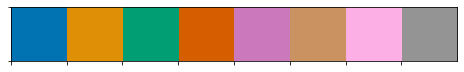

In [29]:
experiments = [
    'historical', 'SSP1-2.6', #'SSP2-4.5', 'SSP3-7.0', 'SSP5-8.5', 'piControl',
]

variables = [
    'photoC_TOT_zint_100m',
    'photoC_diat_zint_100m',
#    'photoC_TOT_zint',
#    'photoC_diat_zint',
#    'POC_FLUX_100m',
#    'CaCO3_FLUX_100m',
#    'diaz_Nfix',
#    'NOx_FLUX',
#    'NHy_FLUX',
#    'DENITRIF',
#    'SedDenitrif',
#    'DON_RIV_FLUX',
#    'DONr_RIV_FLUX',
#    'FG_CO2',    
]

time_slices = {
    'historical': slice("1990-01-01", "2014-12-31"),
    'SSP1-2.6': slice("2090-01-01", "2099-12-31"),
    'SSP2-4.5': slice("2090-01-01", "2099-12-31"),
    'SSP3-7.0': slice("2090-01-01", "2099-12-31"),
    'SSP5-8.5': slice("2090-01-01", "2099-12-31"),
}

variable_labels = dict(
    FG_CO2='Air-sea CO$_2$ flux',
    photoC_TOT_zint_100m='NPP (z > -100m)',
    photoC_TOT_zint='NPP',
    POC_FLUX_100m='POC flux (100 m)',
)

current_palette = sns.color_palette('colorblind', 8)
sns.palplot(current_palette)

exp_colors = {
    'piControl': current_palette.as_hex()[-1],
    'historical': 'k',
    'SSP1-2.6': current_palette.as_hex()[0],
    'SSP2-4.5': current_palette.as_hex()[1],
    'SSP3-7.0': current_palette.as_hex()[2],
    'SSP5-8.5': current_palette.as_hex()[3],
}


## get component objects

In [46]:
%%time
cmp = {}
for v in variables:
    cmp[v] = {}
    for e in experiments:
        cmp[v][e] = fnl.Component(
            model='cesm2',
            experiment=e,
            variable=v,
        )
cmp[v][e]

CPU times: user 2min 34s, sys: 2.57 s, total: 2min 36s
Wall time: 2min 35s


cesm2-piControl-ocn-pop.h-FG_CO2:
  catalog: /glade/u/home/mclong/p/cesm2-marbl/notebooks/funnel/catalogs/campaign-cesm2-cmip6-timeseries.json
  query: {'experiment': 'piControl', 'component': 'ocn', 'stream': 'pop.h', 'variable': ['FG_CO2']}
  assets: <campaign-cesm2-cmip6-timeseries catalog with 1 dataset(s) from 12 asset(s)>

## get datasets

In [47]:
%%time

dsets_ts = {}
dsets_map = {}
for v in variables:
    dsets_ts[v] = {}
    dsets_map[v] = {}
    for e in experiments:
        
        dsets_ts[v][e] = cmp[v][e].timeseries_ann(normalize=False,
                                                  persist=True,
                                                  clobber=False).compute()
        
        if e in time_slices:
            dsets_map[v][e] = cmp[v][e].time_mean(time_slice=time_slices[e],
                                                  persist=True,
                                                  clobber=False).compute()                

Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_TOT_zint_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:04<00:00,  4.30s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_TOT_zint_100m/cesm2-historical-ocn-pop.h-photoC_TOT_zint_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_TOT_zint_100m/cesm2-historical-ocn-pop.h-photoC_TOT_zint_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_TOT_zint_100m/cesm2-historical-ocn-pop.h-photoC_TOT_zint_100m-time-mean-6fad6ce941a1c7d777b07ba4db4b0728.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.15it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint_100m/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint_100m/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint_100m/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint_100m/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint_100m/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint_100m/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.52it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint_100m/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint_100m/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint_100m/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.55it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint_100m/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint_100m/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint_100m/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-photoC_TOT_zint_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.77s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-photoC_TOT_zint_100m/cesm2-piControl-ocn-pop.h-photoC_TOT_zint_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-photoC_TOT_zint_100m/cesm2-piControl-ocn-pop.h-photoC_TOT_zint_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_diat_zint_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:07<00:00,  7.28s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_diat_zint_100m/cesm2-historical-ocn-pop.h-photoC_diat_zint_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_diat_zint_100m/cesm2-historical-ocn-pop.h-photoC_diat_zint_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_diat_zint_100m/cesm2-historical-ocn-pop.h-photoC_diat_zint_100m-time-mean-6fad6ce941a1c7d777b07ba4db4b0728.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.27it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint_100m/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint_100m/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint_100m/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.18s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint_100m/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint_100m/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint_100m/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.19it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint_100m/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint_100m/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint_100m/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.05it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint_100m/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint_100m/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint_100m/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-photoC_diat_zint_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.87s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-photoC_diat_zint_100m/cesm2-piControl-ocn-pop.h-photoC_diat_zint_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-photoC_diat_zint_100m/cesm2-piControl-ocn-pop.h-photoC_diat_zint_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_TOT_zint

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:05<00:00,  5.83s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_TOT_zint/cesm2-historical-ocn-pop.h-photoC_TOT_zint-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_TOT_zint/cesm2-historical-ocn-pop.h-photoC_TOT_zint-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_TOT_zint/cesm2-historical-ocn-pop.h-photoC_TOT_zint-time-mean-6fad6ce941a1c7d777b07ba4db4b0728.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.21s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint/cesm2-SSP1-2.6-ocn-pop.h-photoC_TOT_zint-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.55s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint/cesm2-SSP2-4.5-ocn-pop.h-photoC_TOT_zint-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.41it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint/cesm2-SSP3-7.0-ocn-pop.h-photoC_TOT_zint-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.18it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint/cesm2-SSP5-8.5-ocn-pop.h-photoC_TOT_zint-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-photoC_TOT_zint

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:02<00:00,  2.10s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-photoC_TOT_zint/cesm2-piControl-ocn-pop.h-photoC_TOT_zint-area-mean-294ef0a2270be075de6df997340530d2.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-photoC_TOT_zint/cesm2-piControl-ocn-pop.h-photoC_TOT_zint-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_diat_zint

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:04<00:00,  4.50s/it]
distributed.scheduler - ERROR - Couldn't gather keys {"('mul-2ed556a52adfa3756f7206e9ec6b9f07', 8, 14)": [], "('mul-2ed556a52adfa3756f7206e9ec6b9f07', 2, 3)": [], "('mul-2ed556a52adfa3756f7206e9ec6b9f07', 8, 13)": [], "('mul-2ed556a52adfa3756f7206e9ec6b9f07', 2, 4)": []} state: ['waiting', 'waiting', 'waiting', 'waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('mul-2ed556a52adfa3756f7206e9ec6b9f07', 8, 14)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('mul-2ed556a52adfa3756f7206e9ec6b9f07', 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('mul-2ed556a52adfa3756f7206e9ec6b9f07', 8, 13)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('mul-2ed556a52adfa3756f7206e9ec6b9f07', 2, 4)
NoneType: None


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_diat_zint/cesm2-historical-ocn-pop.h-photoC_diat_zint-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_diat_zint/cesm2-historical-ocn-pop.h-photoC_diat_zint-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-photoC_diat_zint/cesm2-historical-ocn-pop.h-photoC_diat_zint-time-mean-6fad6ce941a1c7d777b07ba4db4b0728.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.42it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint/cesm2-SSP1-2.6-ocn-pop.h-photoC_diat_zint-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.06it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint/cesm2-SSP2-4.5-ocn-pop.h-photoC_diat_zint-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint/cesm2-SSP3-7.0-ocn-pop.h-photoC_diat_zint-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.49it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint/cesm2-SSP5-8.5-ocn-pop.h-photoC_diat_zint-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-photoC_diat_zint

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:04<00:00,  4.15s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-photoC_diat_zint/cesm2-piControl-ocn-pop.h-photoC_diat_zint-area-mean-294ef0a2270be075de6df997340530d2.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-photoC_diat_zint/cesm2-piControl-ocn-pop.h-photoC_diat_zint-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-POC_FLUX_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:04<00:00,  4.00s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-POC_FLUX_100m/cesm2-historical-ocn-pop.h-POC_FLUX_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-POC_FLUX_100m/cesm2-historical-ocn-pop.h-POC_FLUX_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-POC_FLUX_100m/cesm2-historical-ocn-pop.h-POC_FLUX_100m-time-mean-6fad6ce941a1c7d777b07ba4db4b0728.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-POC_FLUX_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.26it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-POC_FLUX_100m/cesm2-SSP1-2.6-ocn-pop.h-POC_FLUX_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-POC_FLUX_100m/cesm2-SSP1-2.6-ocn-pop.h-POC_FLUX_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/utils.py", line 665, in log_errors
    yield
  File "/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/scheduler.py", line 3445, in retire_workers
    lock=False,
  File "/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/scheduler.py", line 3199, in replicate
    assert count > 0
AssertionError
distributed.core - ERROR - 
Traceback (most recent call last):
  File "/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/core.py", line 411, in handle_comm
    result = await result
  File "/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/scheduler.py", line 3445, in retire_workers
    lock=False,
  File "/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/sc

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-POC_FLUX_100m/cesm2-SSP1-2.6-ocn-pop.h-POC_FLUX_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-POC_FLUX_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.14s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-POC_FLUX_100m/cesm2-SSP2-4.5-ocn-pop.h-POC_FLUX_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-POC_FLUX_100m/cesm2-SSP2-4.5-ocn-pop.h-POC_FLUX_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-POC_FLUX_100m/cesm2-SSP2-4.5-ocn-pop.h-POC_FLUX_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-POC_FLUX_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.35it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-POC_FLUX_100m/cesm2-SSP3-7.0-ocn-pop.h-POC_FLUX_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-POC_FLUX_100m/cesm2-SSP3-7.0-ocn-pop.h-POC_FLUX_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-POC_FLUX_100m/cesm2-SSP3-7.0-ocn-pop.h-POC_FLUX_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-POC_FLUX_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.22it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-POC_FLUX_100m/cesm2-SSP5-8.5-ocn-pop.h-POC_FLUX_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-POC_FLUX_100m/cesm2-SSP5-8.5-ocn-pop.h-POC_FLUX_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-POC_FLUX_100m/cesm2-SSP5-8.5-ocn-pop.h-POC_FLUX_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-POC_FLUX_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.76s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-POC_FLUX_100m/cesm2-piControl-ocn-pop.h-POC_FLUX_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-POC_FLUX_100m/cesm2-piControl-ocn-pop.h-POC_FLUX_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-CaCO3_FLUX_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:06<00:00,  6.85s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-CaCO3_FLUX_100m/cesm2-historical-ocn-pop.h-CaCO3_FLUX_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-CaCO3_FLUX_100m/cesm2-historical-ocn-pop.h-CaCO3_FLUX_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-CaCO3_FLUX_100m/cesm2-historical-ocn-pop.h-CaCO3_FLUX_100m-time-mean-6fad6ce941a1c7d777b07ba4db4b0728.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-CaCO3_FLUX_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-CaCO3_FLUX_100m/cesm2-SSP1-2.6-ocn-pop.h-CaCO3_FLUX_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-CaCO3_FLUX_100m/cesm2-SSP1-2.6-ocn-pop.h-CaCO3_FLUX_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-CaCO3_FLUX_100m/cesm2-SSP1-2.6-ocn-pop.h-CaCO3_FLUX_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-CaCO3_FLUX_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-CaCO3_FLUX_100m/cesm2-SSP2-4.5-ocn-pop.h-CaCO3_FLUX_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-CaCO3_FLUX_100m/cesm2-SSP2-4.5-ocn-pop.h-CaCO3_FLUX_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-CaCO3_FLUX_100m/cesm2-SSP2-4.5-ocn-pop.h-CaCO3_FLUX_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-CaCO3_FLUX_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.47it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-CaCO3_FLUX_100m/cesm2-SSP3-7.0-ocn-pop.h-CaCO3_FLUX_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-CaCO3_FLUX_100m/cesm2-SSP3-7.0-ocn-pop.h-CaCO3_FLUX_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-CaCO3_FLUX_100m/cesm2-SSP3-7.0-ocn-pop.h-CaCO3_FLUX_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-CaCO3_FLUX_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.56it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-CaCO3_FLUX_100m/cesm2-SSP5-8.5-ocn-pop.h-CaCO3_FLUX_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-CaCO3_FLUX_100m/cesm2-SSP5-8.5-ocn-pop.h-CaCO3_FLUX_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-CaCO3_FLUX_100m/cesm2-SSP5-8.5-ocn-pop.h-CaCO3_FLUX_100m-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-CaCO3_FLUX_100m

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.83s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-CaCO3_FLUX_100m/cesm2-piControl-ocn-pop.h-CaCO3_FLUX_100m-area-mean-294ef0a2270be075de6df997340530d2.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-CaCO3_FLUX_100m/cesm2-piControl-ocn-pop.h-CaCO3_FLUX_100m-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-diaz_Nfix

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:04<00:00,  4.63s/it]


diaz_Nfix: could not determine target units, skipping


distributed.scheduler - ERROR - Couldn't gather keys {"('sum-aggregate-3c782c8c95485f57decf0be5d399d26d', 9, 10, 0)": ['tcp://10.12.205.13:41839'], "('sum-aggregate-3c782c8c95485f57decf0be5d399d26d', 7, 14, 0)": ['tcp://10.12.205.13:45168'], "('sum-aggregate-3c782c8c95485f57decf0be5d399d26d', 10, 12, 0)": ['tcp://10.12.205.13:42966'], "('sum-aggregate-3c782c8c95485f57decf0be5d399d26d', 3, 10, 0)": ['tcp://10.12.205.13:42966'], "('sum-aggregate-3c782c8c95485f57decf0be5d399d26d', 1, 10, 0)": ['tcp://10.12.205.13:42960'], "('sum-aggregate-3c782c8c95485f57decf0be5d399d26d', 8, 1, 0)": ['tcp://10.12.205.13:41839'], "('sum-aggregate-3c782c8c95485f57decf0be5d399d26d', 9, 15, 0)": ['tcp://10.12.205.13:42960'], "('sum-aggregate-3c782c8c95485f57decf0be5d399d26d', 4, 14, 0)": ['tcp://10.12.205.13:45168'], "('sum-aggregate-3c782c8c95485f57decf0be5d399d26d', 8, 0, 0)": ['tcp://10.12.205.13:45168'], "('sum-aggregate-3c782c8c95485f57decf0be5d399d26d', 6, 4, 0)": ['tcp://10.12.205.13:42960'], "('sum-a

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-diaz_Nfix/cesm2-historical-ocn-pop.h-diaz_Nfix-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-diaz_Nfix/cesm2-historical-ocn-pop.h-diaz_Nfix-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
diaz_Nfix: could not determine target units, skipping
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-diaz_Nfix/cesm2-historical-ocn-pop.h-diaz_Nfix-time-mean-6fad6ce941a1c7d777b07ba4db4b0728.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-diaz_Nfix

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.52it/s]


diaz_Nfix: could not determine target units, skipping
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-diaz_Nfix/cesm2-SSP1-2.6-ocn-pop.h-diaz_Nfix-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-diaz_Nfix/cesm2-SSP1-2.6-ocn-pop.h-diaz_Nfix-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
diaz_Nfix: could not determine target units, skipping
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-diaz_Nfix/cesm2-SSP1-2.6-ocn-pop.h-diaz_Nfix-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-diaz_Nfix

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.01it/s]


diaz_Nfix: could not determine target units, skipping


distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/utils.py", line 665, in log_errors
    yield
  File "/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/scheduler.py", line 3445, in retire_workers
    lock=False,
  File "/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/scheduler.py", line 3199, in replicate
    assert count > 0
AssertionError
distributed.core - ERROR - 
Traceback (most recent call last):
  File "/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/core.py", line 411, in handle_comm
    result = await result
  File "/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/scheduler.py", line 3445, in retire_workers
    lock=False,
  File "/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/sc

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-diaz_Nfix/cesm2-SSP2-4.5-ocn-pop.h-diaz_Nfix-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-diaz_Nfix/cesm2-SSP2-4.5-ocn-pop.h-diaz_Nfix-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
diaz_Nfix: could not determine target units, skipping
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-diaz_Nfix/cesm2-SSP2-4.5-ocn-pop.h-diaz_Nfix-time-mean-753afc24686e480ead107b0e27f521b4.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-diaz_Nfix

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.17it/s]


diaz_Nfix: could not determine target units, skipping
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-diaz_Nfix/cesm2-SSP3-7.0-ocn-pop.h-diaz_Nfix-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-diaz_Nfix/cesm2-SSP3-7.0-ocn-pop.h-diaz_Nfix-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
diaz_Nfix: could not determine target units, skipping
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-diaz_Nfix/cesm2-SSP3-7.0-ocn-pop.h-diaz_Nfix-time-mean-753afc24686e480ead107b0e27f521b4.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-diaz_Nfix

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]


diaz_Nfix: could not determine target units, skipping
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-diaz_Nfix/cesm2-SSP5-8.5-ocn-pop.h-diaz_Nfix-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-diaz_Nfix/cesm2-SSP5-8.5-ocn-pop.h-diaz_Nfix-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
diaz_Nfix: could not determine target units, skipping
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-diaz_Nfix/cesm2-SSP5-8.5-ocn-pop.h-diaz_Nfix-time-mean-753afc24686e480ead107b0e27f521b4.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-diaz_Nfix

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:03<00:00,  3.75s/it]


diaz_Nfix: could not determine target units, skipping
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-diaz_Nfix/cesm2-piControl-ocn-pop.h-diaz_Nfix-area-mean-294ef0a2270be075de6df997340530d2.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-diaz_Nfix/cesm2-piControl-ocn-pop.h-diaz_Nfix-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-NOx_FLUX

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:05<00:00,  5.15s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-NOx_FLUX/cesm2-historical-ocn-pop.h-NOx_FLUX-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-NOx_FLUX/cesm2-historical-ocn-pop.h-NOx_FLUX-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-NOx_FLUX/cesm2-historical-ocn-pop.h-NOx_FLUX-time-mean-6fad6ce941a1c7d777b07ba4db4b0728.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-NOx_FLUX

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.21it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-NOx_FLUX/cesm2-SSP1-2.6-ocn-pop.h-NOx_FLUX-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-NOx_FLUX/cesm2-SSP1-2.6-ocn-pop.h-NOx_FLUX-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-NOx_FLUX/cesm2-SSP1-2.6-ocn-pop.h-NOx_FLUX-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-NOx_FLUX

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.57s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-NOx_FLUX/cesm2-SSP2-4.5-ocn-pop.h-NOx_FLUX-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-NOx_FLUX/cesm2-SSP2-4.5-ocn-pop.h-NOx_FLUX-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-NOx_FLUX/cesm2-SSP2-4.5-ocn-pop.h-NOx_FLUX-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-NOx_FLUX

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.14it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-NOx_FLUX/cesm2-SSP3-7.0-ocn-pop.h-NOx_FLUX-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-NOx_FLUX/cesm2-SSP3-7.0-ocn-pop.h-NOx_FLUX-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-NOx_FLUX/cesm2-SSP3-7.0-ocn-pop.h-NOx_FLUX-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-NOx_FLUX

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.21it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-NOx_FLUX/cesm2-SSP5-8.5-ocn-pop.h-NOx_FLUX-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-NOx_FLUX/cesm2-SSP5-8.5-ocn-pop.h-NOx_FLUX-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-NOx_FLUX/cesm2-SSP5-8.5-ocn-pop.h-NOx_FLUX-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-NOx_FLUX

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:02<00:00,  2.13s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-NOx_FLUX/cesm2-piControl-ocn-pop.h-NOx_FLUX-area-mean-294ef0a2270be075de6df997340530d2.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-NOx_FLUX/cesm2-piControl-ocn-pop.h-NOx_FLUX-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-NHy_FLUX

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:05<00:00,  5.90s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-NHy_FLUX/cesm2-historical-ocn-pop.h-NHy_FLUX-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-NHy_FLUX/cesm2-historical-ocn-pop.h-NHy_FLUX-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-NHy_FLUX/cesm2-historical-ocn-pop.h-NHy_FLUX-time-mean-6fad6ce941a1c7d777b07ba4db4b0728.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-NHy_FLUX

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.22it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-NHy_FLUX/cesm2-SSP1-2.6-ocn-pop.h-NHy_FLUX-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-NHy_FLUX/cesm2-SSP1-2.6-ocn-pop.h-NHy_FLUX-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP1-2.6-ocn-pop.h-NHy_FLUX/cesm2-SSP1-2.6-ocn-pop.h-NHy_FLUX-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-NHy_FLUX

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.19s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-NHy_FLUX/cesm2-SSP2-4.5-ocn-pop.h-NHy_FLUX-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-NHy_FLUX/cesm2-SSP2-4.5-ocn-pop.h-NHy_FLUX-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP2-4.5-ocn-pop.h-NHy_FLUX/cesm2-SSP2-4.5-ocn-pop.h-NHy_FLUX-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-NHy_FLUX

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.23s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-NHy_FLUX/cesm2-SSP3-7.0-ocn-pop.h-NHy_FLUX-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-NHy_FLUX/cesm2-SSP3-7.0-ocn-pop.h-NHy_FLUX-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP3-7.0-ocn-pop.h-NHy_FLUX/cesm2-SSP3-7.0-ocn-pop.h-NHy_FLUX-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-NHy_FLUX

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.25it/s]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-NHy_FLUX/cesm2-SSP5-8.5-ocn-pop.h-NHy_FLUX-area-mean-294ef0a2270be075de6df997340530d2.zarr
writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-NHy_FLUX/cesm2-SSP5-8.5-ocn-pop.h-NHy_FLUX-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-SSP5-8.5-ocn-pop.h-NHy_FLUX/cesm2-SSP5-8.5-ocn-pop.h-NHy_FLUX-time-mean-753afc24686e480ead107b0e27f521b4.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-NHy_FLUX

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:03<00:00,  3.83s/it]


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-NHy_FLUX/cesm2-piControl-ocn-pop.h-NHy_FLUX-area-mean-294ef0a2270be075de6df997340530d2.zarr


Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]

writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-piControl-ocn-pop.h-NHy_FLUX/cesm2-piControl-ocn-pop.h-NHy_FLUX-timeseries-ann-dc1ef533967affdac7ff1871110271b5.zarr
making /glade/p/cgd/oce/projects/cesm2-marbl/funnel/cesm2-historical-ocn-pop.h-DENITRIF

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component:experiment:stream'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:04<00:00,  4.95s/it]


DENITRIF: could not determine target units, skipping


KilledWorker: ("('open_dataset-concatenate-9099bfb8e84bc869b2cb056382141362', 7, 0, 0, 0)", <Worker 'tcp://10.12.205.13:44750', name: 904, memory: 0, processing: 8>)

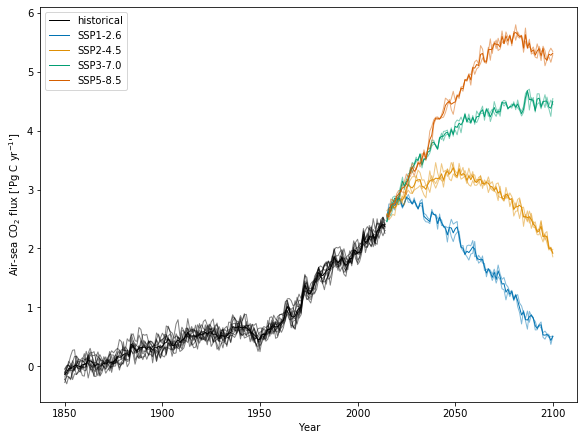

In [48]:
v = 'FG_CO2'

nrow = 1
ncol = 1
fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol*2, 3*nrow*2),
                       constrained_layout=True)

for e in experiments:
    if e == 'piControl': continue
    ds = dsets[v][e]
    for member_id in ds.member_id.values:
        ax.plot(ds.time, ds[v].sel(member_id=member_id), '-', alpha=0.5, linewidth=1, color=exp_colors[e])
    ax.plot(ds.time, ds[v].mean('member_id'), '-', linewidth=1, color=exp_colors[e], label=e)

ax.set_ylabel(f'{variable_labels[v]} {[ds[v].units]}')    
ax.set_xlabel('Year')
plt.legend();

sketching a "Collection" object below....

In [ ]:
import intake
catalog = intake.open_esm_datastore('data/campaign-cesm2-cmip6-timeseries.json', sep=':')
variables = catalog.search(component='ocn').df.variable.unique()
variables = sorted(variables)

with open('all-ocn-vars.yml', 'w') as fid:
    for v in variables:
        fid.write(f'        - {v}\n')

In [ ]:
from itertools import product
import pandas as pd

class Collection(object):
    """class to aggregate multiple `Components`"""
    
    def __init__(self, **indexes):
        keys = indexes.keys()

        index = pd.MultiIndex.from_product(
            [indexes[k] for k in keys], 
            names=keys,
        )
        
        components = [fnl.Component(**{k: v for k, v in zip(keys, vals)})
                      for vals in product(*[indexes[k] for k in keys])]
        self._data = pd.DataFrame(components, index=index)
    
        
x = Collection(
    model=['cesm2'],
    experiment=experiments,
    variable=variables,
)   
print(x._data)